# Working with city boundary shapefiles

In [ ]:
import geopandas as gpd
import osmnx as ox
import rioxarray
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import mapping

In [2]:
import geopandas as gpd


## Administrative boundaries (from OCHA)

In [36]:
# 1. Load the full ADM3 layer
adm3 = gpd.read_file("/Users/helyne/code/climatematch/impact-scholars-proje../data/raw/OCHA-HDX/bfa_admin_boundaries.shp")

# 2. Inspect columns once
adm3.columns


/Users/helyne/.pyenv/versions/climatematch/lib/python3.13/site-packages/pyogrio/geopandas.py:275: UserWarning: More than one layer found in 'bfa_admin_boundaries.shp': 'bfa_admin3_em' (default), 'bfa_admin1_em', 'bfa_admin3', 'bfa_admin2', 'bfa_admin0', 'bfa_adminlines', 'bfa_admin1', 'bfa_admin2_em', 'bfa_admin0_em', 'bfa_adminpoints'. Specify layer parameter to avoid this warning.
  result = read_func(


Index(['adm3_name', 'adm3_name1', 'adm3_name2', 'adm3_name3', 'adm3_pcode',
       'adm2_name', 'adm2_name1', 'adm2_name2', 'adm2_name3', 'adm2_pcode',
       'adm1_name', 'adm1_name1', 'adm1_name2', 'adm1_name3', 'adm1_pcode',
       'adm0_name', 'adm0_name1', 'adm0_name2', 'adm0_name3', 'adm0_pcode',
       'valid_on', 'valid_to', 'area_sqkm', 'version', 'lang', 'lang1',
       'lang2', 'lang3', 'adm3_ref_n', 'center_lat', 'center_lon', 'geometry'],
      dtype='object')

In [37]:
adm3.head()

,adm3_name,adm3_name1,adm3_name2,adm3_name3,adm3_pcode,adm2_name,adm2_name1,adm2_name2,adm2_name3,adm2_pcode,...,area_sqkm,version,lang,lang1,lang2,lang3,adm3_ref_n,center_lat,center_lon,geometry
0,Ambsouya,None,None,None,BF550301,Oubritenga,None,None,None,BF5503,...,308.647206,v02,fr,None,None,None,Ambsouya,12.583987,-0.994226,"POLYGON ((-1.0851 12.6895, -1.07876 12.68718, ..."
1,Andemtenga,None,None,None,BF480301,Kourittenga,None,None,None,BF4803,...,707.435607,v02,fr,None,None,None,Andemtenga,12.393731,-0.264707,"POLYGON ((-0.32776 12.58606, -0.31282 12.56944..."
2,Arbinda,None,None,None,BF560301,Soum,None,None,None,BF5603,...,2835.271171,v02,fr,None,None,None,Arbinda,14.169619,-0.842710,"POLYGON ((-0.76574 14.48448, -0.76551 14.48354..."
3,Arbollé,None,None,None,BF540201,Passoré,None,None,None,BF5402,...,656.651325,v02,fr,None,None,None,Arbolle,12.826714,-2.014204,"POLYGON ((-2.07173 12.98137, -2.07172 12.9812,..."
4,Bagaré,None,None,None,BF540202,Passoré,None,None,None,BF5402,...,460.534090,v02,fr,None,None,None,Bagare,12.876434,-2.630447,"POLYGON ((-2.6882 12.99999, -2.68802 12.99999,..."


In [38]:

# 3. Filter to Ouagadougou by name
ouaga = adm3[adm3["adm3_name"].str.contains("Ouagadougou", case=False, na=False)]

ouaga[["adm0_name", "adm1_name", "adm2_name", "adm3_name", "valid_on", "area_sqkm", "center_lat", "center_lon", "geometry"]]


,adm0_name,adm1_name,adm2_name,adm3_name,valid_on,area_sqkm,center_lat,center_lon,geometry
223,Burkina Faso,Centre,Kadiogo,Ouagadougou,2020-03-23,550.742456,12.379857,-1.548081,"POLYGON ((-1.46186 12.50046, -1.4574 12.49982,..."


In [40]:
# 4. Save as the city boundary shapefile
ouaga.to_file("../data/raw/OCHA-HDX/ouagadougou_admin_boundary.shp")


/Users/helyne/.pyenv/versions/climatematch/lib/python3.13/site-packages/pyogrio/raw.py:723: RuntimeWarning: Field valid_on create as date field, though DateTime requested.
  ogr_write(
/Users/helyne/.pyenv/versions/climatematch/lib/python3.13/site-packages/pyogrio/raw.py:723: RuntimeWarning: Field valid_to create as date field, though DateTime requested.
  ogr_write(


In [26]:
# Check CRS
ouaga.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [27]:
# Reproject to a projected CRS (e.g. UTM zone for Burkina Faso)
ouaga_utm = ouaga.to_crs(epsg=32630)  # double-check correct UTM

<Axes: >

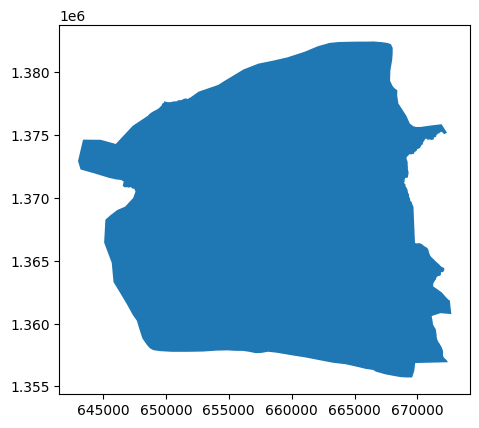

In [28]:
# You can also visually inspect
ouaga_utm.plot()

In [ ]:

ouaga_utm.to_file("../data/raw/OCHA-HDX/ouagadougou_admin_boundary_utm.shp")

# Using OSM

In [21]:
import osmnx as ox

place_name = "Ouagadougou, Burkina Faso"
ouaga2 = ox.geocode_to_gdf(place_name)

# Ensure a projected CRS for area-preserving operations if needed
ouaga2 = ouaga2.to_crs(epsg=32630)
ouaga2


,geometry,bbox_west,bbox_south,bbox_east,bbox_north,place_id,osm_type,osm_id,lat,lon,class,type,place_rank,importance,addresstype,name,display_name
0,"POLYGON ((646331.913 1362269.492, 646458.583 1...",-1.654274,12.251189,-1.407587,12.491113,276330711,relation,5675756,12.370474,-1.53341,boundary,administrative,12,0.28727,department,Ouagadougou,"Ouagadougou, Kadiogo, Centre, Burkina Faso"


<Axes: >

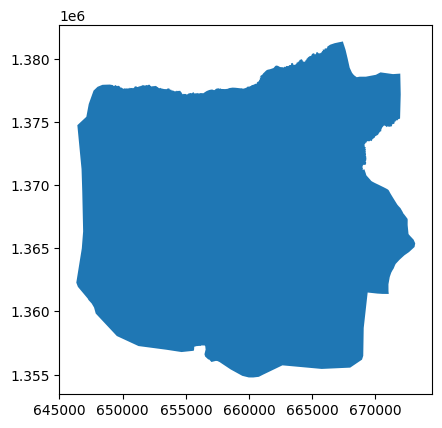

In [22]:
ouaga2.plot()

In [ ]:
ouaga2.to_file("ouagadougou_osm_boundary_utm.shp")

# Masking a GeoTiff

In [ ]:
import rioxarray
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import mapping

ESRI:54009
(-1041000.0, 1000000.0, -41000.0, 2000000.0)


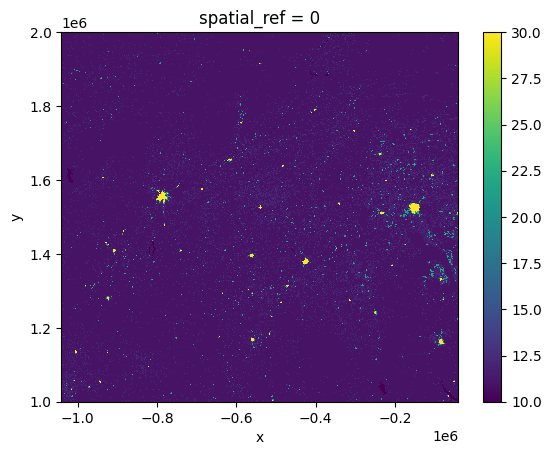

In [ ]:

smod = rioxarray.open_rasterio(
    "../data/raw/GHS-SMOD-Copernicus/GHS_SMOD_E2025_GLOBE_R2023A_54009_1000_V2_0_R8_C18/GHS_SMOD_E2025_GLOBE_R2023A_54009_1000_V2_0_R8_C18.tif"
).squeeze(drop=True)

print(smod.rio.crs)      # should be EPSG:54009
print(smod.rio.bounds()) # to see where this tile sits in Mollweide coords

smod.plot()
plt.show()

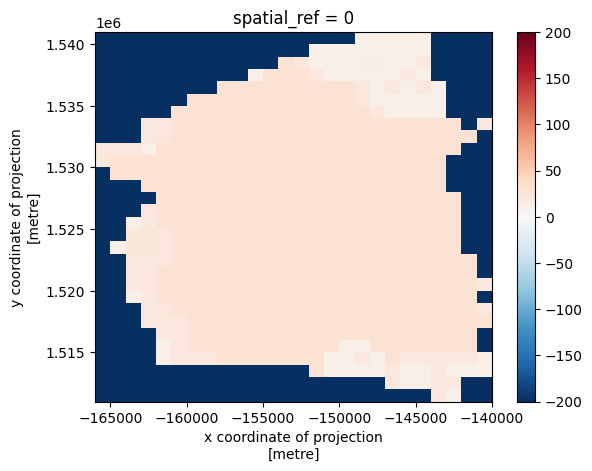

In [ ]:

# Load Ouaga boundary and reproject to Mollweide (same as SMOD)
ouaga = gpd.read_file("../data/raw/OCHA-HDX/ouagadougou_admin_boundary.shp")
ouaga_54009 = ouaga.to_crs(smod.rio.crs)

# Create mask
geom = [mapping(ouaga_54009.geometry.union_all())]

# Clip SMOD to Ouaga extent
smod_ouaga = smod.rio.clip(geom, smod.rio.crs)

smod_ouaga.plot()
plt.show()
